In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Getting the standard stats of Turkish Super League from 2001-2002 season to 2021-2022
seasonalPlayerStats = pd.read_csv(r'C:\Users\User\Desktop\Sports Analytics\Soccer\Turkish League Player Stats (Standard)\TurkishLeague_PlayerStats_Standard_2002_2022.csv')

In [3]:
# Looking at the missing values
seasonalPlayerStats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11756 entries, 0 to 11755
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Season                    11756 non-null  object 
 1   Squad                     11756 non-null  object 
 2   Comp                      11756 non-null  object 
 3   Player                    11752 non-null  object 
 4   Nation                    11294 non-null  object 
 5   Pos                       11301 non-null  object 
 6   Age                       11299 non-null  float64
 7   MP                        6757 non-null   float64
 8   Starts_Playing_Time       11756 non-null  int64  
 9   Min_Playing_Time          11003 non-null  float64
 10  Mins_Per_90_Playing_Time  11006 non-null  float64
 11  Gls                       11006 non-null  float64
 12  Ast                       10987 non-null  float64
 13  G_minus_PK                11006 non-null  float64
 14  PK    

In [4]:
# Drop rows where minutes played is missing or 0
#seasonalPlayerStats = seasonalPlayerStats[seasonalPlayerStats.Min_Playing_Time > 0]

# Check the dataframe again
seasonalPlayerStats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11756 entries, 0 to 11755
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Season                    11756 non-null  object 
 1   Squad                     11756 non-null  object 
 2   Comp                      11756 non-null  object 
 3   Player                    11752 non-null  object 
 4   Nation                    11294 non-null  object 
 5   Pos                       11301 non-null  object 
 6   Age                       11299 non-null  float64
 7   MP                        6757 non-null   float64
 8   Starts_Playing_Time       11756 non-null  int64  
 9   Min_Playing_Time          11003 non-null  float64
 10  Mins_Per_90_Playing_Time  11006 non-null  float64
 11  Gls                       11006 non-null  float64
 12  Ast                       10987 non-null  float64
 13  G_minus_PK                11006 non-null  float64
 14  PK    

In [5]:
# Total Number of Penalty Kicks and Penalty Kicks Attempted for Each Player
playerStats =  seasonalPlayerStats.groupby(['Player'])['PK','PKatt'].sum().reset_index()
playerStats

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Player,PK,PKatt
0,Aaron Appindangoyé,0.0,0.0
1,Aaron Boupendza,2.0,2.0
2,Aaron Lennon,0.0,0.0
3,Aatif Chahechouhe,13.0,17.0
4,Abdel Diarra,0.0,0.0
...,...,...,...
4109,Şenol Erol,0.0,0.0
4110,Şenol Karagöl,0.0,0.0
4111,Şenol Yavaş,0.0,0.0
4112,Štefan Senecký,0.0,0.0


In [6]:
# The players who have at least 10 penatly kicks attempted are filtered
penaltyKickers = playerStats[playerStats.PKatt >= 10].reset_index(drop=True)

# Calculate penalty kick success rate
penaltyKickers['Success(%)'] = round(penaltyKickers.PK * 100 / penaltyKickers.PKatt)
penaltyKickers

,Player,PK,PKatt,Success(%)
0,Aatif Chahechouhe,13.0,17.0,76.0
1,Adem Büyük,18.0,21.0,86.0
2,Adis Jahović,17.0,17.0,100.0
3,Alex,26.0,32.0,81.0
4,Alexandru Maxim,19.0,19.0,100.0
5,Anastasios Bakasetas,8.0,11.0,73.0
6,Arouna Koné,9.0,11.0,82.0
7,Bafétimbi Gomis,9.0,13.0,69.0
8,Bogdan Stancu,16.0,17.0,94.0
9,Burak Yılmaz,30.0,33.0,91.0


In [7]:
# Best Penalty Takers
penaltyKickers.sort_values(by = ['Success(%)','PKatt'], ascending = False)

,Player,PK,PKatt,Success(%)
4,Alexandru Maxim,19.0,19.0,100.0
2,Adis Jahović,17.0,17.0,100.0
22,Kaies Ghodhbane,10.0,10.0,100.0
25,Mehmet Yıldız,10.0,10.0,100.0
36,Vágner Love,10.0,10.0,100.0
8,Bogdan Stancu,16.0,17.0,94.0
10,Cenk Tosun,15.0,16.0,94.0
28,Okan Öztürk,11.0,12.0,92.0
39,İlhan Parlak,11.0,12.0,92.0
9,Burak Yılmaz,30.0,33.0,91.0


In [8]:
# Worst Penalty Takers
penaltyKickers.sort_values(by = ['Success(%)','PKatt'], ascending = [True,True])

,Player,PK,PKatt,Success(%)
26,Muhammet Demir,5.0,11.0,45.0
20,Hugo Rodallega,5.0,10.0,50.0
7,Bafétimbi Gomis,9.0,13.0,69.0
29,Ricardo Quaresma,7.0,10.0,70.0
34,Sidney Cristiano dos Santos,7.0,10.0,70.0
37,Zdravko Lazarov,18.0,25.0,72.0
5,Anastasios Bakasetas,8.0,11.0,73.0
12,Deniz Kadah,8.0,11.0,73.0
23,Léonard Kweuke,9.0,12.0,75.0
11,Cenk İşler,15.0,20.0,75.0


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


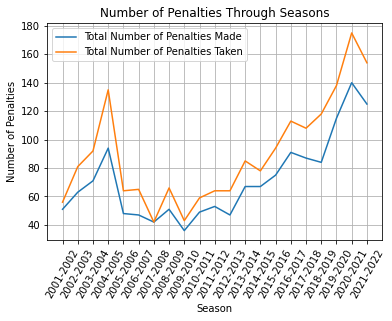

In [9]:
# Total Number of Penalty Goals and Attempts Through Seasons
seasonStats =  seasonalPlayerStats.groupby(['Season'])['PK','PKatt'].sum().reset_index()
plt.title('Number of Penalties Through Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Penalties')
plt.xticks(rotation = 60)
plt.plot(seasonStats.Season, seasonStats.PK, label = "Total Number of Penalties Made")
plt.plot(seasonStats.Season, seasonStats.PKatt, label = "Total Number of Penalties Taken")
plt.legend()
plt.grid()
plt.show()

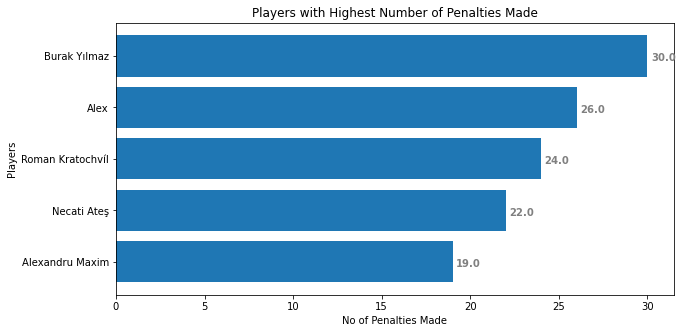

In [10]:
# Most Penalty Goals
mostPenaltyGoals = penaltyKickers.sort_values(by = ['PK','Success(%)'], ascending = False).head(5)

# Figure Size
fig, ax = plt.subplots(figsize =(10, 5))
 
# Horizontal Bar Plot
ax.barh(mostPenaltyGoals.Player,mostPenaltyGoals.PK) 

# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title("Players with Highest Number of Penalties Made") 
plt.xlabel("No of Penalties Made")
plt.ylabel("Players")
 
# Show Plot
plt.show()

In [12]:
# Goals without any penalty goal
nonPenaltyGoals = seasonalPlayerStats.groupby(['Player'])['PK','PKatt','Gls'].sum().reset_index()
nonPenaltyGoals = nonPenaltyGoals[nonPenaltyGoals.PK == 0]
nonPenaltyGoals = nonPenaltyGoals[nonPenaltyGoals.Gls > 0]
nonPenaltyGoals.sort_values(by = 'Gls',ascending = False).head(5)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Player,PK,PKatt,Gls
3688,Veysel Cihan,0.0,1.0,68.0
2694,Mustafa Pektemek,0.0,0.0,68.0
1777,Isaac Promise,0.0,0.0,64.0
3594,Tuncay Şanlı,0.0,0.0,60.0
3800,Yasin Öztekin,0.0,1.0,50.0


In [13]:
# Players With Different Teams
penaltyWithDifferentTeams = seasonalPlayerStats.groupby(['Player','Squad'])['PK','PKatt'].sum().reset_index()
penaltyWithDifferentTeams = penaltyWithDifferentTeams[penaltyWithDifferentTeams.PK > 0]
countOfTeams = penaltyWithDifferentTeams.groupby(['Player'])['Squad'].count().reset_index()
penaltyWithDifferentTeams = pd.merge(penaltyWithDifferentTeams,countOfTeams,on = ['Player'])
penaltyWithDifferentTeams.rename(columns={"Squad_y":"Number of Teams","Squad_x":"Team"},inplace = True)
penaltyWithDifferentTeams.sort_values(by = ['Number of Teams','Player'], ascending = False).head(10)

# Sinan Kaloğlu 
sinanK = penaltyWithDifferentTeams[penaltyWithDifferentTeams.Player == 'Sinan Kaloğlu']

# Necati Ateş
necatiA = penaltyWithDifferentTeams[penaltyWithDifferentTeams.Player == 'Necati Ateş']

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [14]:
sinanK

,Player,Team,PK,PKatt,Number of Teams
475,Sinan Kaloğlu,Altay,2.0,2.0,5
476,Sinan Kaloğlu,Bursaspor,1.0,1.0,5
477,Sinan Kaloğlu,Diyarbakirspor,2.0,4.0,5
478,Sinan Kaloğlu,Elazığspor,1.0,1.0,5
479,Sinan Kaloğlu,Manisaspor,1.0,1.0,5


In [15]:
necatiA

,Player,Team,PK,PKatt,Number of Teams
371,Necati Ateş,Adanaspor,4.0,4.0,5
372,Necati Ateş,Antalyaspor,8.0,8.0,5
373,Necati Ateş,Eskişehirspor,4.0,5.0,5
374,Necati Ateş,Galatasaray,5.0,7.0,5
375,Necati Ateş,İstanbul BB,1.0,1.0,5


In [16]:
def absolute_value(val):
    a  = np.round(val/100.* sinanK.PK.sum(), 0)
    return a


def absolute_value1(val):
    a  = np.round(val/100.* necatiA.PK.sum(), 0)
    return a

Text(0.5, 1.0, 'Necati Ateş')

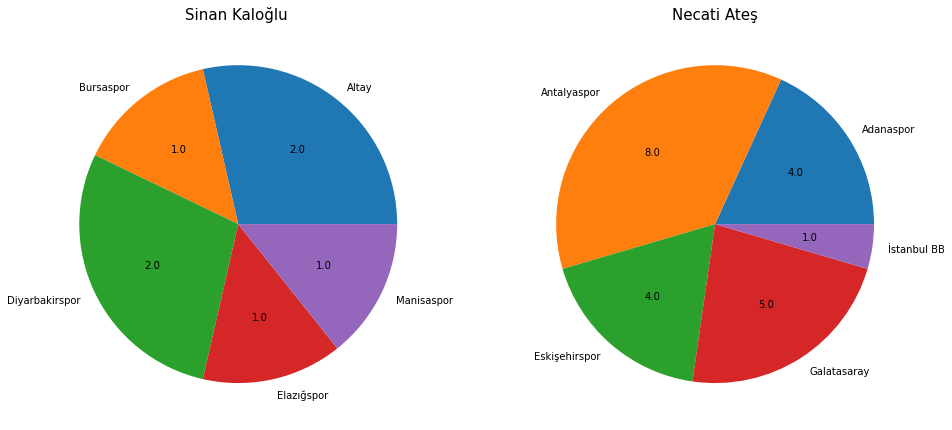

In [17]:
# Sinan Kaloğlu and Necati Ateş side by side
f = plt.figure(figsize=(94/6,50/6))
ax = f.add_subplot(121)
ax = plt.pie(sinanK.PK, labels = sinanK.Team, autopct = absolute_value)
plt.grid(True)
plt.title("Sinan Kaloğlu ", fontsize = 15)
ax = f.add_subplot(122)
ax = plt.pie(necatiA.PK, labels = necatiA.Team, autopct = absolute_value1)
plt.grid(True)
plt.title("Necati Ateş", fontsize = 15)